## Introduction to Binary Search
A searching algorithm is a limited search space. Only applicable when sorted.

### Find X in a sorted array
Consider the sorted array [3,4,6,7,9,12,16,17]  
We have to find 6  
The below shows how to find 6 using binary search
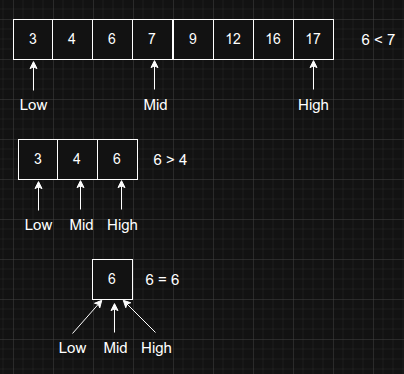

In [1]:
arr = [3,4,6,7,9,12,16,17]
target = 6
low = 0
high = len(arr) - 1
while low <= high:
    mid = int((low+high)/2)
    if arr[mid] == target:
        print(mid)
        break
    elif target > arr[mid]:
        low = mid+1
    else:
        high = mid-1
print(-1)

2
-1


In [8]:
# Using Recursion
def binarySearch(arr,low,high,target):
    if low > high:
        return -1
    mid = int((low+high)/2)
    if arr[mid] == target:
        return mid
    elif target > arr[mid]:
        return binarySearch(arr,mid+1,high,target)
    return binarySearch(arr,low,mid-1,target)

arr = [3,4,6,7,9,12,16,17]
target = 12

print(binarySearch(arr,0,len(arr)-1,target))

5


#### Time Complexity
We are divide the array into 2 for every iteration  
The time complexity is O(log<sub>2</sub> n)